# Exercise 6: Support Vector Machines - Linear model

In Andrew NG's course the training SVM algorithm is already provided and exercise is around identifying the optimal C and $\sigma$ values.

> Helpful document:
> https://medium.com/geekculture/svm-classification-with-sklearn-svm-svc-how-to-plot-a-decision-boundary-with-margins-in-2d-space-7232cb3962c0

In [1]:
# Importing the needed libraries
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We'll use loadmap to load the matlab dataset
from scipy.io import loadmat

# tells matplotlib to embed plots within the notebook
%matplotlib inline

from sklearn.svm import SVC

## Linear SVM

In [2]:
# Loading all data on a dictonary
data = loadmat('ex6data1.mat')

# Convert the data into a numpy array
X = data['X']
y = data['y'].flatten()

# m = number of training examples
# n = number of features
(m,n) = X.shape

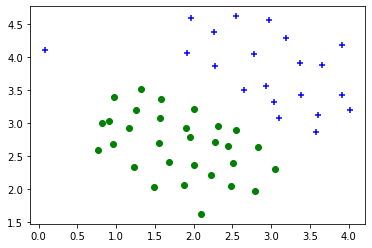

In [3]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], marker='o', c='Green')
plt.scatter(X[y==1][:,0], X[y==1][:,1], marker='+', c='Blue')

In [4]:
svm = SVC(kernel='linear' , C=1.0, random_state=1)
svm.fit(X, y)

SVC(kernel='linear', random_state=1)

In [5]:
svm.coef_, svm.intercept_, svm.classes_, svm.support_vectors_

(array([[1.40718563, 2.13398052]]),
 array([-10.34889778]),
 array([0, 1], dtype=uint8),
 array([[1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [1.3191  , 3.5109  ],
        [2.5403  , 2.8867  ],
        [3.5772  , 2.856   ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.6555  , 3.5008  ],
        [3.0357  , 3.3165  ],
        [0.086405, 4.1045  ]]))

## Drawing the decision boundary

In [6]:
X_bound = np.linspace(0, 4.5)
y_bound = np.array((-svm.coef_[0,0]/svm.coef_[0,1])* X_bound) - svm.intercept_/svm.coef_[0,1]

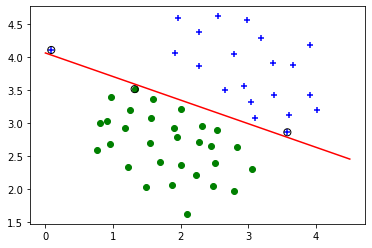

In [12]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], marker='o', c='Green')
plt.scatter(X[y==1][:,0], X[y==1][:,1], marker='+', c='Blue')

# Encircle support vectors
plt.scatter(svm.support_vectors_[:, 0],
            svm.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='Black', 
            alpha=1)

plt.plot(X_bound, y_bound, c='Red')

#### Drawing the SVM margins

In [8]:
# Unit-vector
w_hat = svm.coef_[0, 0] / (np.sqrt(np.sum(svm.coef_[0, 0] ** 2)))
# Margin
margin = 1 / np.sqrt(np.sum(svm.coef_[0, 0] ** 2))
decision_boundary_points = np.array(list(zip(X_bound, y_bound)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin

> The <code>zip()</code> function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc.

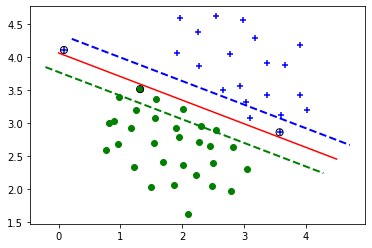

In [11]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], marker='o', c='Green')
plt.scatter(X[y==1][:,0], X[y==1][:,1], marker='+', c='Blue')

# Encircle support vectors
plt.scatter(svm.support_vectors_[:, 0],
            svm.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='Black', 
            alpha=1)

# Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--', 
         linewidth=2)# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--',
         linewidth=2)

plt.plot(X_bound, y_bound, c='Red')

## C parameter as the regularization parameter
Let's plot how the decision boundary changes based on the variations of C.

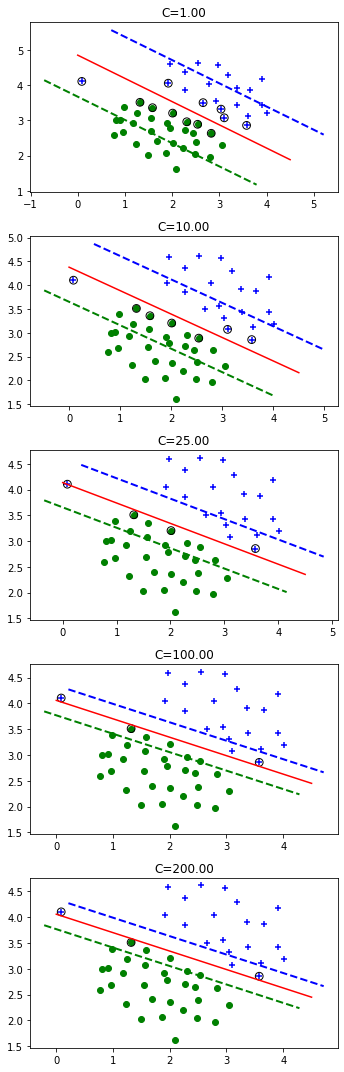

In [10]:
C = [1, 10, 25, 100, 200]
fig, ax = plt.subplots(nrows = len(C), ncols = 1, sharex = False, sharey = False, figsize=(5,15))
for i in range(len(C)):
    # Plot the regression model
    svm = SVC(kernel='linear' , C=C[i], random_state=1)
    svm.fit(X, y)
    y_bound = np.array((-svm.coef_[0,0]/svm.coef_[0,1])* X_bound) - svm.intercept_/svm.coef_[0,1]
    fig.tight_layout()
    ax[i].set_title('C={:.2f}'.format(C[i]))
    # Plot the dataset
    ax[i].scatter(X[y==0][:,0], X[y==0][:,1], marker='o', c='Green')
    ax[i].scatter(X[y==1][:,0], X[y==1][:,1], marker='+', c='Blue')
    # Encircle support vectors
    ax[i].scatter(svm.support_vectors_[:, 0],
                  svm.support_vectors_[:, 1], 
                  s=60, 
                  facecolors='none', 
                  edgecolors='Black', 
                  alpha=1)
    
    # Draw the boundary line
    ax[i].plot(X_bound, y_bound, c='Red')
    
    # Draw the margins
    decision_boundary_points = np.array(list(zip(X_bound, y_bound)))
    # Unit-vector
    w_hat = svm.coef_[0, 0] / (np.sqrt(np.sum(svm.coef_[0, 0] ** 2)))
    # Margin
    margin = 1 / np.sqrt(np.sum(svm.coef_[0, 0] ** 2))
    points_of_line_above = decision_boundary_points + w_hat * margin
    points_of_line_below = decision_boundary_points - w_hat * margin
    # Blue margin line above
    ax[i].plot(points_of_line_above[:, 0], 
               points_of_line_above[:, 1], 
               'b--', 
               linewidth=2)# Green margin line below
    ax[i].plot(points_of_line_below[:, 0], 
               points_of_line_below[:, 1], 
               'g--',
               linewidth=2)

<div class="alert alert-block alert-info"> <b>Conclusion:</b> C is related to the regularization concept. Via C we can control the penalty for misclassification:
    
* Small C: We are less strict about misclassification errors -> increases the bias/lowers the variance (prone to underfit)
    
* High C: Large error penalties -> lowers the bias/increases the variance (prone to overfit) </div>